In [6]:
import pandas as pd
df = pd.read_csv('india-data.csv', index_col=0)
df.index

Index(['Uttar Pradesh', 'Maharashtra', 'Bihar', 'West Bengal',
       'Madhya Pradesh', 'Tamil Nadu', 'Rajasthan', 'Karnataka', 'Gujarat',
       'Andhra Pradesh', 'Odisha', 'Telangana', 'Kerala', 'Jharkhand', 'Assam',
       'Punjab', 'Chhattisgarh', 'Haryana', 'Delhi', 'Jammu and Kashmir',
       'Uttarakhand', 'Himachal Pradesh', 'Tripura', 'Meghalaya', 'Manipur',
       'Nagaland', 'Goa', 'Arunachal Pradesh', 'Puducherry', 'Mizoram',
       'Chandigarh', 'Sikkim', 'Andaman and Nicobar Islands',
       'Dadra and Nagar Haveli', 'Daman and Diu', 'Lakshadweep'],
      dtype='object', name='State/UT')

In [7]:
df.columns

Index(['Male Population', 'Female Population', 'Area (km2)',
       'Male Literacy (%)', 'Fertility Rate', 'Female Literacy (%)'],
      dtype='object')

In [8]:
df.head(3)

,Male Population,Female Population,Area (km2),Male Literacy (%),Fertility Rate,Female Literacy (%)
State/UT,,,,,,
Uttar Pradesh,104480510,95331831,240928,79.24,3.7,59.26
Maharashtra,58243056,54131277,307713,89.82,1.9,75.48
Bihar,54278157,49821295,94163,73.39,3.9,53.33


In [9]:
df.tail(3)

,Male Population,Female Population,Area (km2),Male Literacy (%),Fertility Rate,Female Literacy (%)
State/UT,,,,,,
Dadra and Nagar Haveli,193760,149949,491,86.46,3.3,65.93
Daman and Diu,150301,92946,112,91.48,1.9,79.59
Lakshadweep,33123,31350,32,96.11,2.1,88.25


In [16]:
df['Population'] = df['Male Population'] + df['Female Population']
total_pop = df['Population'].sum()
print(f'Total population: {total_pop: ,d}')

Total population:  1,210,754,977


In [24]:
df['Population Density (km-2)'] = df['Population'] / df['Area (km2)']
pop_density = df.loc['Daman and Diu', 'Population Density (km-2)']
print(f'The population Density of Daman and Diu is: {pop_density}')

The population Density of Daman and Diu is2171.848214285714


In [26]:
total_pop_den = df['Population Density (km-2)'].sum()
total_pop_den

38503.325515116616

In [27]:
df['Female Literacy (%)'].min()

52.66

In [28]:
df['Population Density (km-2)'].idxmax()

'Delhi'

In [29]:
df['Area (km2)'].idxmax()

'Rajasthan'

In [30]:
df.loc[df['Population Density (km-2)'].idxmax()]

Male Population              8.887326e+06
Female Population            7.800615e+06
Area (km2)                   1.484000e+03
Male Literacy (%)            9.103000e+01
Fertility Rate               1.900000e+00
Female Literacy (%)          8.093000e+01
Population                   1.668794e+07
Population Density (km-2)    1.124524e+04
Name: Delhi, dtype: float64

In [31]:
df.loc[df['Population Density (km-2)'].idxmin()]

Male Population              7.139120e+05
Female Population            6.698150e+05
Area (km2)                   8.374300e+04
Male Literacy (%)            7.369000e+01
Fertility Rate               2.700000e+00
Female Literacy (%)          5.957000e+01
Population                   1.383727e+06
Population Density (km-2)    1.652349e+01
Name: Arunachal Pradesh, dtype: float64

In [34]:
df['Female Literacy (%)'].corr(df['Fertility Rate'])

-0.7361949271996956

In [35]:
df['Male Literacy (%)'].corr(df['Fertility Rate'])

-0.6380765321097214

In [40]:
df[['Female Literacy (%)', 'Fertility Rate']].head()

,Female Literacy (%),Fertility Rate
State/UT,,
Uttar Pradesh,59.26,3.7
Maharashtra,75.48,1.9
Bihar,53.33,3.9
West Bengal,71.16,1.9
Madhya Pradesh,60.02,3.3


In [41]:
df.loc['Uttar Pradesh'].corr(df.loc['Maharashtra'])

0.9999779889214314

<Axes: xlabel='Female Literacy (%)', ylabel='Fertility Rate'>

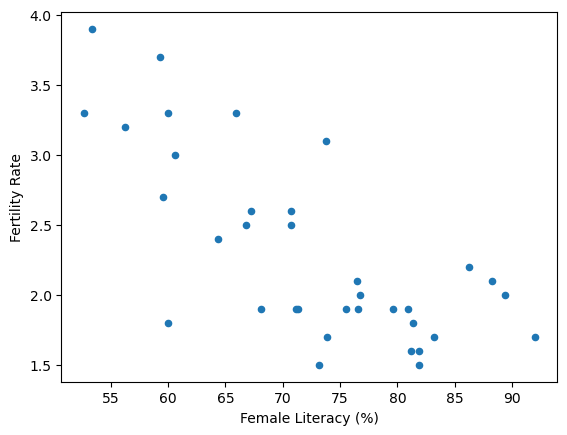

In [44]:
df.plot.scatter('Female Literacy (%)', 'Fertility Rate')

In [11]:
import pandas as pd
import numpy as np
df = pd.read_csv('ionization-energies.csv', skiprows=1, usecols=range(5), index_col=0,  nrows=11)
df.columns = df.columns.str.strip()
print('Second ionization energy of Li: {} eV'.format(df.loc['Li'].IE2))
df


Second ionization energy of Li: 75.64018 eV


,IE1,IE2,IE3,IE4
Element,,,,
H,13.59844,NaN,NaN,NaN
He,24.58741,54.41778,NaN,NaN
Li,5.39172,75.64018,122.45429,NaN
Be,9.32270,18.21116,153.89661,217.71865
B,8.29803,25.15484,37.93064,259.37521
C,11.26030,24.38332,47.88780,64.49390
N,14.53414,29.60130,47.44924,77.47350
O,13.61806,35.11730,54.93550,77.41353
F,17.42282,34.97082,62.70840,87.13980


In [14]:
df = pd.read_excel('bond-lengths.xlsx',
index_col=0, # the first column contains the index labels
skipfooter=2, # ignore the last two lines of the sheet
header=1, # take the column names from the second row
usecols='A:E', # use Excel columns labeled A-E
sheet_name='Diatomics' # take data from this sheet
)
print(df)

          Bond length /A    we /cm-1  wexe /cm-1  De /kJ.mol-1
Molecule                                                      
I2              2.666000   214.50000     0.61400    224.104224
O2              1.207520  1580.19000    11.98000    623.340895
Cl2             1.987000   559.70000     2.67000    350.883683
F2              1.411930   916.64000    11.23600    223.640111
N2              1.097680  2358.57000    14.32400   1161.440719
CO              1.128323  2169.81358    13.28831   1059.592595
NO              1.150770  1904.20000    14.07500    770.443043


### Web Scraping

In [25]:
dfs = pd.read_html(
'https://en.wikipedia.org/wiki/List_of_wine-producing_regions',index_col=1, match="Wine production by country")
dfs[0].head()

,Rank,Production (tonnes)
Country,,
Italy,1,5088500
France,2,3713200
Spain,3,3700588
United States,4,2057021
China,5,1814400
